In [1]:
import ets_grid as ETS
import pandas as pd

In [2]:
df = pd.read_csv('DailyDelhiClimateTest.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
ts = df['meantemp']
n=10
train, test = ts[0:len(ts)-n], ts[len(ts)-n:]

In [5]:
ets_grid = ETS.ETSGRID(train, test,7)

In [6]:
results = ets_grid.etsgridsearch()
results

,Trend,Seasonal,seasonal_period,AIC,BIC,error_mse_fitting,error_mae_fitting,error_mape_fitting,error_mse_prediction,error_mae_prediction,error_mape_prediction
0,add,mul,7,131.29,163.022,3,1,0,5,2,0
1,mul,mul,7,131.948,163.68,3,1,0,7,3,0
2,add,add,7,132.126,163.859,3,1,0,7,2,0
3,mul,add,7,132.579,164.312,3,1,0,2,1,0


- Training and testing MSE, MAE and MAPE are  evaluated along with model AIC and BIC
- Depending on time series sutiable matrices can be considered to find best trend and seasonality
- Default results are sorted based on AIC values. 

### Fit model optimal trend and seasonality

In [7]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


model_ETS= ExponentialSmoothing( endog=train, trend=results['Trend'][0], seasonal=results['Seasonal'][0], 
                                seasonal_periods=results['seasonal_period'][0],damped=True, dates=None, freq=None, missing='none').fit()
predictions_ETS = model_ETS.predict(start=len(train),end=len(train)+len(test)-1)
error_ETS_mae_fitting = round(mean_absolute_error(train, model_ETS.fittedvalues),1)
error_ETS_mae_prediction = round(mean_absolute_error(test, predictions_ETS),1)
model_ETS.summary()

Dep. Variable:,meantemp,No. Observations:,104
Model:,ExponentialSmoothing,SSE,291.786
Optimized:,True,AIC,131.290
Trend:,Additive,BIC,163.022
Seasonal:,Multiplicative,AICC,136.009
Seasonal Periods:,7,Date:,"Tue, 12 Oct 2021"
Box-Cox:,False,Time:,17:24:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8616522,alpha,True
smoothing_trend,0.000000,beta,True


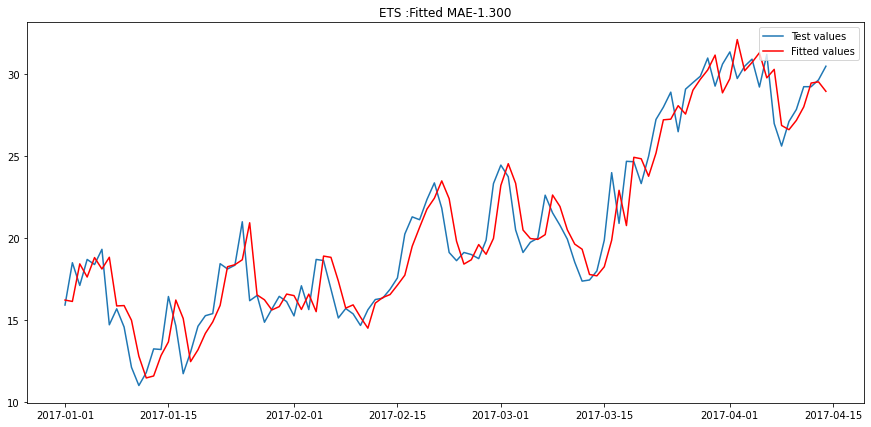

In [8]:
# training vs fitting plot
plt.figure(figsize=(15,7))
plt.plot(train, label="Test values")
plt.plot(train.index,model_ETS.fittedvalues , label="Fitted values",color='red')
plt.title('ETS :Fitted MAE-%.3f' % error_ETS_mae_fitting)
plt.legend(loc=1)
plt.show()

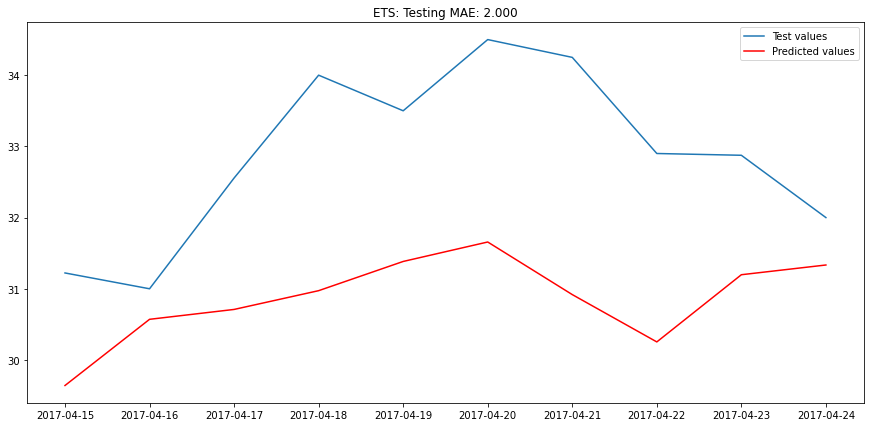

In [9]:
# Actual vs prediciton 
plt.figure(figsize=(15,7))
plt.plot(test, label="Test values")
plt.plot(test.index, predictions_ETS, label="Predicted values",color='red')
plt.title('ETS: Testing MAE: %.3f' % error_ETS_mae_prediction)
plt.legend(loc=1)
plt.show()